# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

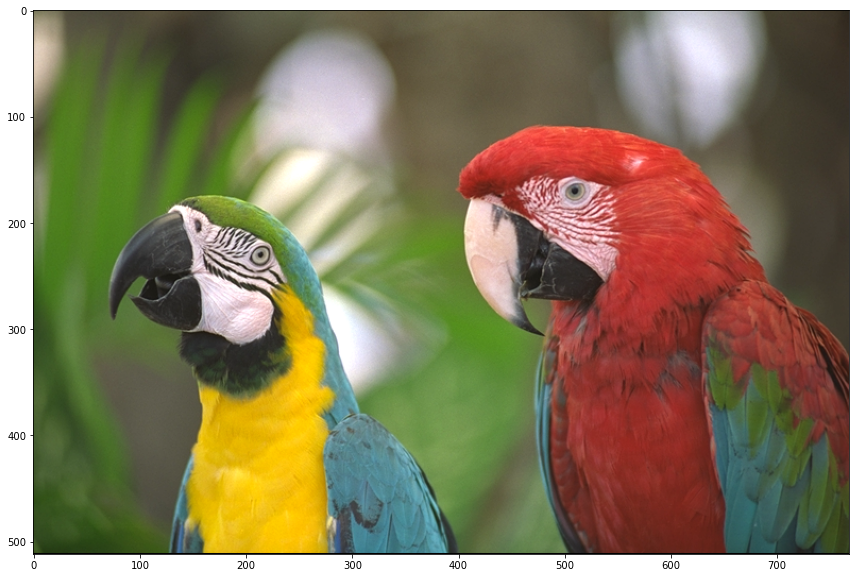

In [2]:
# Load image
img = cv2.imread('../data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [3]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [4]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel
img = img.astype(np.uint8)

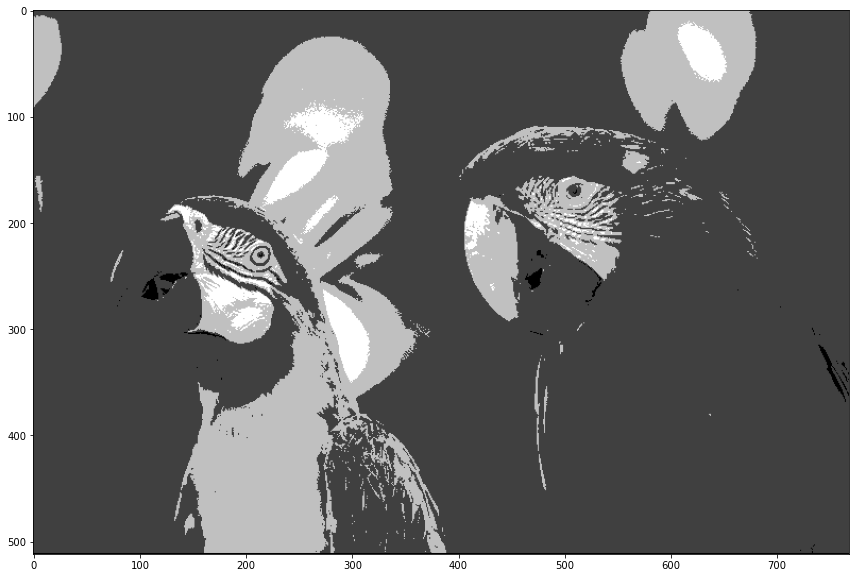

In [5]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype('uint8'))

In [6]:
# Compute average quantization error
avg_quant_error = np.average(img - quantized)
print(avg_quant_error)

9.172205


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [7]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img).astype(np.float32)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r+1, c, :] = img_tmp[r+1, c, :] + quant_error * 7/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 3/16
        img_tmp[r, c+1, :] = img_tmp[r, c+1, :] + quant_error * 5/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 1/16       
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x258c66a2580>)

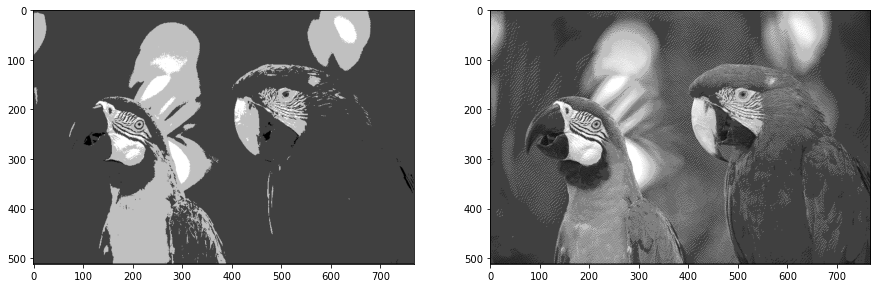

In [8]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype('uint8'))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype('uint8'))   # dithering

In [9]:
# Compute average quantization error for dithered image
avg_dith_error = np.average(img - dithering)
print(avg_dith_error)

119.52372148301866


### Questions
* Which image has higher quantization error? Optimally quantized or dithered?
  
  Dithered image has bigger quantization error

* Which image looks better to you?
   
   With Floyd-Steinberg Dithering

* Can you repeat the same process using only two colours: black and white? Show me :-)
   
   Yes, see bellow

In [10]:
colors = np.array([[0, 0, 0],
                   [255, 255, 255]])

# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel
img = img.astype(np.uint8)

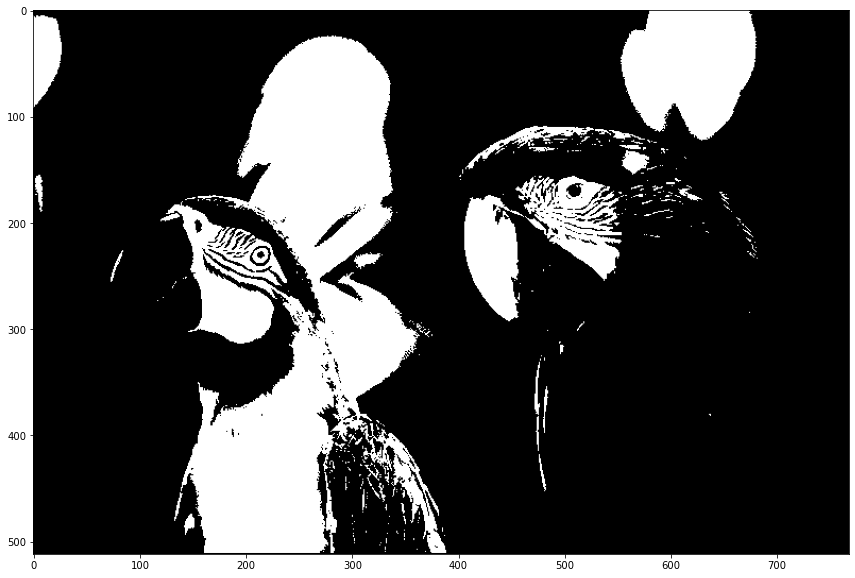

In [11]:
plt.imshow(quantized.astype('uint8'))

In [12]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img).astype(np.float32)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r+1, c, :] = img_tmp[r+1, c, :] + quant_error * 7/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 3/16
        img_tmp[r, c+1, :] = img_tmp[r, c+1, :] + quant_error * 5/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 1/16       
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x258c6957880>)

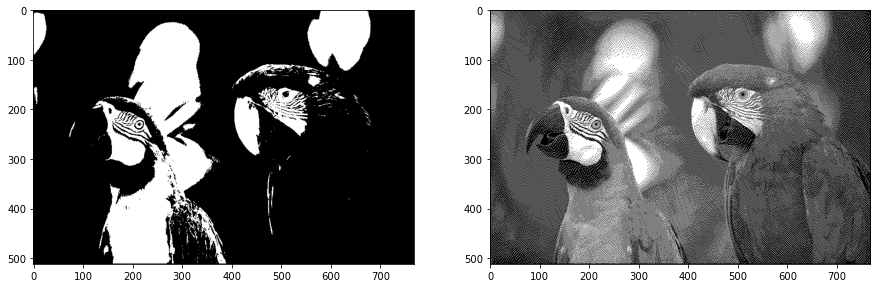

In [13]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype('uint8'))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype('uint8'))   # dithering

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_
print(colors)

[[ 55.55221417]
 [187.33818301]
 [134.48458373]
 [ 89.65306104]
 [226.99149386]
 [  4.10605314]
 [101.91481185]
 [ 43.88259878]
 [ 66.96221769]
 [167.81720507]
 [117.65033796]
 [205.7030144 ]
 [249.45610218]
 [ 77.80998648]
 [ 31.41912581]
 [149.77799478]]


Apply FS dithering the same way you did before.
* How does the result look like to you?
   
   More detailed image with more colors

* What happens if we use 32 colours?
 
   I see gray image but with more details - it is very strange I expecte it should show more colours, maybe something wrong with colors definition... but for now I have no idea how to fix it because it out of course scope

* And what happens if we use 256 colours?

   The same as with 32 colors

In [15]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

img = img.astype(np.uint8)

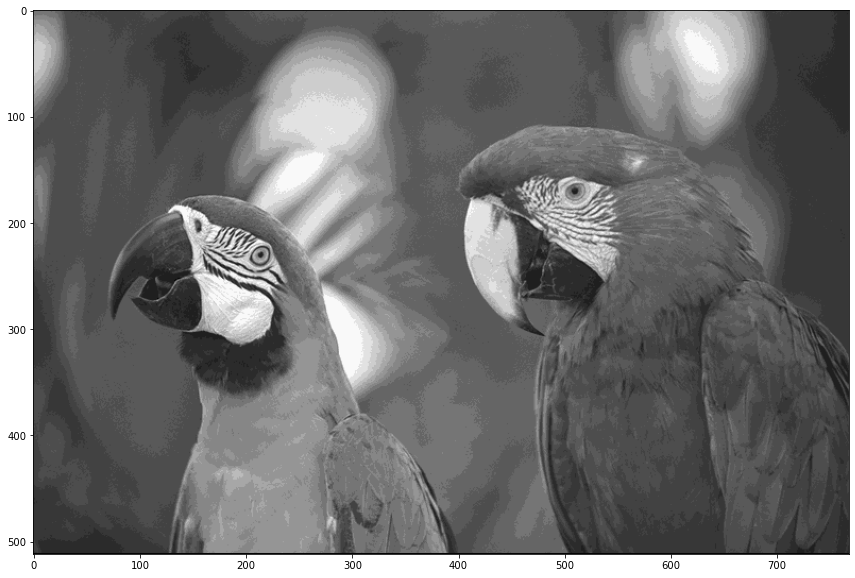

In [16]:
# Show quantized image (don't forget to cast back to uint8)

plt.imshow(quantized.astype('uint8'))

In [17]:
# Compute average quantization error
avg_quant_error = np.average(img - quantized)
print(avg_quant_error)

0.16748348


In [18]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img).astype(np.float32)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r+1, c, :] = img_tmp[r+1, c, :] + quant_error * 7/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 3/16
        img_tmp[r, c+1, :] = img_tmp[r, c+1, :] + quant_error * 5/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 1/16       
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<AxesSubplot:title={'center':'Dithering'}>,
 Text(0.5, 1.0, 'Dithering'))

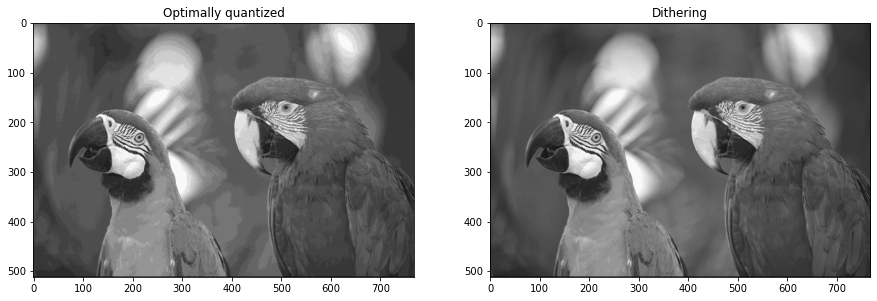

In [19]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype('uint8')), plt.title('Optimally quantized')   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype('uint8')), plt.title('Dithering')   # dithering

In [20]:
# Compute average quantization error for dithered image
avg_dith_error = np.average(img - dithering)
print(avg_dith_error)

117.42510901557074


In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=256).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_
print(colors)

[[9.20000000e+01]
 [1.83000000e+02]
 [4.80000000e+01]
 [2.30000000e+02]
 [1.39000000e+02]
 [6.60000000e+01]
 [2.10000000e+01]
 [1.17000000e+02]
 [1.60000000e+02]
 [2.08000000e+02]
 [2.55000000e+02]
 [7.90000000e+01]
 [3.60000000e+01]
 [1.09000000e+02]
 [1.27000000e+02]
 [8.00000000e+00]
 [1.51000000e+02]
 [5.70000000e+01]
 [1.94000000e+02]
 [1.70000000e+02]
 [7.10000000e+01]
 [1.03000000e+02]
 [2.19000000e+02]
 [8.40000000e+01]
 [2.43000000e+02]
 [4.60000000e+01]
 [9.80000000e+01]
 [4.10000000e+01]
 [2.90000000e+01]
 [1.31000000e+02]
 [3.75166564e-12]
 [6.00000000e+01]
 [2.01000000e+02]
 [1.47000000e+02]
 [5.30000000e+01]
 [7.50000000e+01]
 [1.79000000e+02]
 [8.80000000e+01]
 [1.14000000e+02]
 [1.64000000e+02]
 [2.25000000e+02]
 [2.38000000e+02]
 [1.86000000e+02]
 [1.21000000e+02]
 [6.40000000e+01]
 [2.15000000e+02]
 [2.48000000e+02]
 [1.54000000e+02]
 [1.43000000e+02]
 [9.50000000e+01]
 [8.10000000e+01]
 [1.33000000e+02]
 [5.00000000e+01]
 [1.20000000e+01]
 [1.92000000e+02]
 [1.770000

In [22]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel
        
img = img.astype(np.uint8)

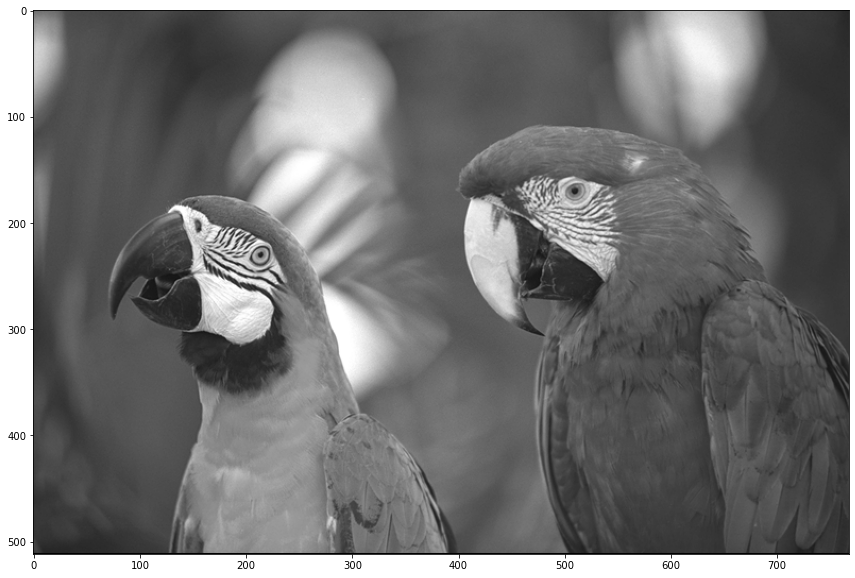

In [23]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype('uint8'))

In [24]:
# Compute average quantization error
avg_quant_error = np.average(img - quantized)
print(avg_quant_error)

-0.0025770399


In [25]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img).astype(np.float32)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r+1, c, :] = img_tmp[r+1, c, :] + quant_error * 7/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 3/16
        img_tmp[r, c+1, :] = img_tmp[r, c+1, :] + quant_error * 5/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 1/16       
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<AxesSubplot:title={'center':'Dithering'}>,
 Text(0.5, 1.0, 'Dithering'))

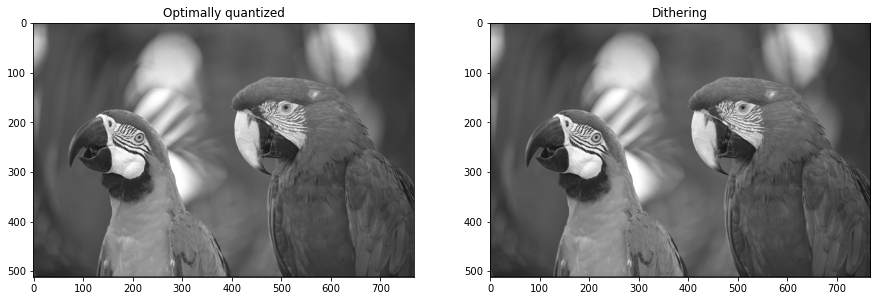

In [26]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype('uint8')), plt.title('Optimally quantized')   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype('uint8')), plt.title('Dithering')   # dithering

In [27]:
# Compute average quantization error for dithered image
avg_dith_error = np.average(img - dithering)
print(avg_dith_error)

112.35230085584853
